# 2012 Presidential Campaign Finance Analysis 
## Chisheng Li

### Introduction
This project analyzes the 2012 Presidential Campaign Contributions data to compare Barack Obama's and Mitt Romney's campaign finance between March 2011 and December 2012. The dataset is obtained from the Federal Election Commission (FEC).

### Dataset preparation
The dataset is downloaded and renamed to `donations.txt` with the following commands:
```
unzip P00000001-ALL.zip
mv P00000001-ALL.csv donations.txt
```

### Exploring the data
The FEC decided that it would be cool to insert commas at the end of each line, fooling the CSV readers that there empty fields at the end of every line. Eg. the first row of the dataset:
```
C00410118,"P20002978","Bachmann, Michele","HARVEY, WILLIAM","MOBILE","AL","366010290","RETIRED","RETIRED",250,20-JUN-11,"","","","SA17A","736166","A1FDABC23D2D545A1B83","P2012",
```

`pandas's` file parsers treat the first column as the data frame's row name by default if the data set has 1 too many columns, hence insert `index_col=False` to drop the last column to display the data frame properly. The dataset has 18 columns and 6,036,458 rows.

In [17]:
import pandas as pd
import numpy as np
donations = pd.read_csv('donations.txt', dtype={'contbr_zip': 'str', 'file_num': 'str'}, index_col=False)
# How many rows and columns does the dataframe have?
donations.shape

(6036458, 18)

In [2]:
# The first 5 lines of the dataset
donations.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00410118,P20002978,"Bachmann, Michele","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166,A1FDABC23D2D545A1B83,P2012
1,C00410118,P20002978,"Bachmann, Michele","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166,A899B9B0E223743EFA63,P2012
2,C00410118,P20002978,"Bachmann, Michele","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073,A4B144E3CB3294ABC9D6,P2012
3,C00410118,P20002978,"Bachmann, Michele","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073,A8C7C6F55B0914C5A880,P2012
4,C00410118,P20002978,"Bachmann, Michele","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166,A070D6D560BD84AA98AC,P2012


In [3]:
# Now, look at the last 5 lines
donations.tail()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
6036453,C00505800,P20003984,"Stein, Jill","KATAHIRA, DEAN",RIPON,WI,54971,RIPON COLLEGE,TEACHER,100,06-SEP-12,NaN,NaN,NaN,SA17A,823142,SA17A.16242,G2012
6036454,C00505800,P20003984,"Stein, Jill","YOUNG, FRANK",RIPLEY,WV,25271,JACKSON COUNTY RECYCLING CENTER,RECYCLING PROGRAM MANAGER,250,06-SEP-12,NaN,NaN,NaN,SA17A,823142,SA17A.16299,G2012
6036455,C00505800,P20003984,"Stein, Jill","RHODES, JC",CODY,WY,82414,RETIRED,PEACE OFFICER,250,14-SEP-12,NaN,NaN,NaN,SA17A,823142,SA17A.16868,G2012
6036456,C00505800,P20003984,"Stein, Jill","RHODES, JC",CODY,WY,82414,RETIRED,PEACE OFFICER,250,09-OCT-12,NaN,NaN,NaN,SA17A,825219,SA17A.19233,G2012
6036457,C00505800,P20003984,"Stein, Jill","BRAULT, CLARE",MONTREAL,ZZ,NaN,RETIRED,NaN,250,03-AUG-12,NaN,NaN,NaN,SA17A,811430,SA17A.12252,P2012


Generate some summary statistics of the entire dataset. There are 6,036,458 observations in the campaign contributions data. Although there are extreme outliers in this dataset, with the highest donation amount at \$16,387,179.20 and the lowest donation amount at -\$60,800.00, the interquartile range is moderate. The 25th percentile donation amount is \$25.00, the 75th percentile donation amount is \$150.00, and the median donation amount is \$50.00. The average donation to all presidential candidates is \$212.99, suggesting a right skewed distribution.

In [4]:
donations.describe()

,contb_receipt_amt
count,6036458.000000
mean,212.997098
std,8957.272203
min,-60800.000000
25%,25.000000
50%,50.000000
75%,150.000000
max,16387179.200000


Sorting the campaign contributions by decreasing amount indicates that [the Obama Victory Fund](http://www.opensecrets.org/news/2011/08/obama-victory-fund-brings-in-cash/) contributed the highest donations to Barack Obama during the 2012 president election cycle.

In [5]:
donations.sort('contb_receipt_amt', ascending=False)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
3280428,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,16387179.20,28-SEP-12,NaN,X,*,SA18,821325,CZ22557505,G2012
3243511,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,8701608.42,31-AUG-12,NaN,X,*,SA18,811365,CZ19625190,P2012
3142436,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,4743767.11,05-OCT-12,NaN,X,*,SA18,846396,CZ24626997,G2012
3108174,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,4260530.67,24-OCT-12,NaN,X,* OBAMA VICTORY FUND 2012,SA18,840327,CZ27865768,G2012
3143563,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,4031228.17,17-OCT-12,NaN,X,*,SA18,846396,CZ26406950,G2012
3119225,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,3761760.87,12-OCT-12,NaN,X,*,SA18,846396,CZ25897187,G2012
3121739,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,3444452.42,31-OCT-12,NaN,X,* OBAMA VICTORY FUND 2012,SA18,840327,CZ28604151,G2012
3202725,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,3387248.02,30-JUN-12,NaN,X,*,SA18,810684,CZ16639625,P2012
3220245,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,3187630.19,31-JUL-12,NaN,X,*,SA18,806136,CZ18143031,P2012
3119743,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,2965818.76,06-NOV-12,NaN,X,* OBAMA VICTORY FUND 2012,SA18,840327,CZ29815072,G2012


### Basic campaign finance statistics

Subset the positive campaign donations to President Barack Obama:

In [6]:
obama = donations[(donations['cand_nm'] == 'Obama, Barack') & 
                  (donations['contb_receipt_amt'] > 0)]
obama

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
1594097,C00431445,P80003338,"Obama, Barack","SMITH, MAUREEN P.",UNITED KINGDOM,AA,NaN,HOMEMAKER,HOMEMAKER,1000,28-OCT-12,NaN,NaN,NaN,SA17A,840327,C28501220,G2012
1594098,C00431445,P80003338,"Obama, Barack","HAWLEY, JULIA",DPO,AA,340310243,USG,FED AGENT,40,31-OCT-12,NaN,X,* OBAMA VICTORY FUND 2012,SA18,840327,C30086573,G2012
1594099,C00431445,P80003338,"Obama, Barack","HAWLEY, JULIA",DPO,AA,340310243,USG,FED AGENT,40,30-OCT-12,NaN,X,* OBAMA VICTORY FUND 2012,SA18,840327,C29942338,G2012
1594100,C00431445,P80003338,"Obama, Barack","MOASE, BENNETT",TORONTO,AA,33884,DISABLED,DISABLED,8,05-NOV-12,NaN,X,* OBAMA VICTORY FUND 2012,SA18,840327,C30067205,G2012
1594101,C00431445,P80003338,"Obama, Barack","MOASE, BENNETT",TORONTO,AA,33884,DISABLED,DISABLED,8,05-NOV-12,NaN,X,* OBAMA VICTORY FUND 2012,SA18,840327,C30071746,G2012
1594102,C00431445,P80003338,"Obama, Barack","PETTY, ROBERT",HONG KONG,AA,06524,CLEARWATER CAPITAL PARTNERS,INVESTOR,1000,29-OCT-12,NaN,X,* OBAMA VICTORY FUND 2012,SA18,840327,C29941789,G2012
1594107,C00431445,P80003338,"Obama, Barack","GREICIUS, LUKE",DPO,AA,34030,US DEPT OF STATE,DIPLOMAT,250,22-OCT-12,NaN,NaN,NaN,SA17A,840327,C27522149,G2012
1594108,C00431445,P80003338,"Obama, Barack","GASSAM, GERALDINE",DPO,AA,340230111,U.S. DEPARTMENT OF STATE,FOREIGN SERVICE OFFICER,17,22-OCT-12,NaN,NaN,NaN,SA17A,840327,C27557910,G2012
1594109,C00431445,P80003338,"Obama, Barack","GILL, BATES",MAERSTA,AA,19592,SIPRI,DIRECTOR,281,21-OCT-12,NaN,NaN,NaN,SA17A,840327,C26867814,G2012
1594110,C00431445,P80003338,"Obama, Barack","GOLEC KENIGER, SHARON",PARIS,AA,75014,LEGALTEAM SOLUTIONS,CONSULTANT,100,28-OCT-12,NaN,NaN,NaN,SA17A,840327,C28502641,G2012


Subset the positive campaign donations to Mitt Romney:

In [7]:
romney = donations[(donations['cand_nm'] == 'Romney, Mitt') & 
                  (donations['contb_receipt_amt'] > 0)]
romney

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
411,C00431171,P80003353,"Romney, Mitt","CLARK, MICHAEL",FORT MEYERS,33,33908,RETIRED,NONE,200,21-SEP-12,NaN,NaN,NaN,SA17A,822044,SA17.2726391,G2012
412,C00431171,P80003353,"Romney, Mitt","CALIENES, GLADYS MS.",GABLES,33,33146,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,100,12-SEP-12,NaN,NaN,NaN,SA17A,822044,SA17.2588087,G2012
413,C00431171,P80003353,"Romney, Mitt","HOUSMAN, STEVEN",WESTON,33,33327,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,225,06-SEP-12,NaN,NaN,NaN,SA17A,822044,SA17.2391328,G2012
414,C00431171,P80003353,"Romney, Mitt","CLARK, MICHAEL",FORT MEYERS,33,33908,RETIRED,RETIRED,126,13-SEP-12,NaN,X,TRANSFER FROM ROMNEY VICTORY INC.,SA18,944828,SA18.2547714.26.V008,G2012
415,C00431171,P80003353,"Romney, Mitt","HOUSMAN, STEVEN",WESTON,33,33327,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,225,06-SEP-12,NaN,NaN,NaN,SA17A,944828,SA17.2391328,G2012
416,C00431171,P80003353,"Romney, Mitt","CLARK, MICHAEL",FORT MEYERS,33,33908,RETIRED,NONE,200,21-SEP-12,NaN,NaN,NaN,SA17A,944828,SA17.2726391,G2012
417,C00431171,P80003353,"Romney, Mitt","CALIENES, GLADYS MS.",GABLES,33,33146,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,100,12-SEP-12,NaN,NaN,NaN,SA17A,944828,SA17.2588087,G2012
418,C00431171,P80003353,"Romney, Mitt","CLARK, MICHAEL",FORT MEYERS,33,33908,RETIRED,RETIRED,126,13-SEP-12,NaN,X,TRANSFER FROM ROMNEY VICTORY INC.,SA18,822044,SA18.2547714.26.V008,G2012
419,C00431171,P80003353,"Romney, Mitt","KARPINSKI, MARILYN",BIG OTTER LAKES,46,46737,N/Z,RETIRED,110,13-SEP-12,NaN,NaN,NaN,SA17A,822044,SA17.2532613,G2012
420,C00431171,P80003353,"Romney, Mitt","KARPINSKI, MARILYN",BIG OTTER LAKES,46,46737,RETIRED,RETIRED,41,03-SEP-12,NaN,X,TRANSFER FROM ROMNEY VICTORY INC.,SA18,822044,SA18.2349192.26.V006,G2012


In [8]:
# Calculate the total positive donations to Obama and Romney
totalOb = 0
totalRom = 0

for row in obama['contb_receipt_amt']:
    amountOb = float(row)
    totalOb += amountOb

for row in romney['contb_receipt_amt']:
    amountRom = float(row)
    totalRom += amountRom

Barack Obama received 4,078,945 non-refund/non-zero donations for the 2012 president election, totaling \$558,359,124.90. The minimum donation was \$0.01, and the maximum amount was \$16,387,179.20. His average donation amount was \$136.89, and the median amount was \$50.00.

In [9]:
# Obama's campaign finance stats:
print "Total positive donations: $%s" % totalOb
obama.describe()

Total positive donations: $558359124.9


,contb_receipt_amt
count,4078945.000000
mean,136.888123
std,10883.523683
min,0.010000
25%,20.000000
50%,50.000000
75%,100.000000
max,16387179.200000


On the other hand, Mitt Romney received 1,576,478 non-refund/non-zero donations for the election, totaling \$679,994,941.51. The minimum amount was \$0.01, and the maximum amount was \$30,000. Despite having fewer donors than Obama, Romney received higher average donation at \$431.34 and higher median amount at \$100.50.

In [10]:
# Romney's campaign finance stats:
print "Total positive donations: $%s" % totalRom
romney.describe()

Total positive donations: $679994941.51


,contb_receipt_amt
count,1576478.000000
mean,431.338047
std,724.779886
min,0.010000
25%,50.000000
50%,100.500000
75%,350.000000
max,30000.000000


### Comparing Obama's and Romney's campaign donations by states

Across 50 states and Washington D.C., Obama out raised Romney in only 14 states that are Democratic stronghold: California, District of Columbia, Delaware, Hawaii, Illinois, Massachusetts, Maryland, Maine, New Mexico, New York, Oregon, Rhode Island, Vermont, Washington.
The 3 states where Obama received the highest amount of donations were Illinois (\$96.25 million), California (\$93.64 million) and New York (\$51.73 million). The 3 states where Romney received the highest amount of donations were California (\$79.06 million), Texas (\$70.05 million) and Florida (\$58.76 million).

In [15]:
# Aggregate Obama's non-refund/non-zero donations by States
obaState = obama[obama['contbr_st'].isin(['AK', 'AL', 'AR', 'AZ', 'CA', 
                                          'CO', 'CT', 'DC', 'DE', 'FL', 
                                          'GA', 'HI', 'IA', 'ID', 'IL', 
                                          'IN', 'KS', 'KY', 'LA', 'MA', 
                                          'MD', 'ME', 'MI', 'MN', 'MO', 
                                          'MS', 'MT', 'NC', 'ND', 'NE', 
                                          'NH', 'NJ', 'NM', 'NV', 'NY', 
                                          'OH', 'OK', 'OR', 'PA', 'RI', 
                                          'SC', 'SD', 'TN', 'TX', 'UT', 
                                          'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])]

obst = obaState.groupby('contbr_st')

In [28]:
# obaState.groupby('contbr_st').agg(['mean', 'count', 'std'])
obst_sum = obst['contb_receipt_amt'].agg([np.sum, np.mean, len])
obst_sum.columns = ["Obama's total donations ($)", "Obama's average donation ($)", 
                    "Obama's number of donations by state"]

In [20]:
# Aggregate Romney's non-refund/non-zero donations by States
romState = romney[romney['contbr_st'].isin(['AK', 'AL', 'AR', 'AZ', 'CA', 
                                            'CO', 'CT', 'DC', 'DE', 'FL', 
                                            'GA', 'HI', 'IA', 'ID', 'IL', 
                                            'IN', 'KS', 'KY', 'LA', 'MA', 
                                            'MD', 'ME', 'MI', 'MN', 'MO', 
                                            'MS', 'MT', 'NC', 'ND', 'NE', 
                                            'NH', 'NJ', 'NM', 'NV', 'NY', 
                                            'OH', 'OK', 'OR', 'PA', 'RI', 
                                            'SC', 'SD', 'TN', 'TX', 'UT', 
                                            'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])]

rmst = romState.groupby('contbr_st')

In [30]:
rmst_sum = rmst['contb_receipt_amt'].agg([np.sum, np.mean, len])
rmst_sum.columns = ["Romney's total donations ($)", "Romney's average donation ($)", 
                    "Romney's number of donations by state"]

In [31]:
camst = pd.concat([obst_sum, rmst_sum], axis=1)
camst

,Obama's total donations ($),Obama's average donation ($),Obama's number of donations by state,Romney's total donations ($),Romney's average donation ($),Romney's number of donations by state
contbr_st,,,,,,
AK,1381715.270000,102.311386,13505,1442757.99,300.136882,4807
AL,2294366.010000,92.690422,24753,7577573.41,377.256468,20086
AR,1325963.500000,103.834260,12770,3564955.91,438.224451,8135
AZ,6619365.540000,84.433914,78397,14345640.43,322.729307,44451
CA,93638609.420000,130.571012,717147,79060173.72,413.853941,191034
CO,11266696.450000,103.726755,108619,16963554.56,371.161267,45704
CT,8454331.020000,128.851463,65613,17010449.85,678.220559,25081
DC,14060203.950000,204.013523,68918,4857768.75,720.416543,6743
DE,1370555.860000,111.363928,12307,1364076.26,360.390029,3785


In [76]:
# Plot Obama's campaign donations to Plotly
import plotly.plotly as py

ob = pd.read_csv('obama donations', delimiter='\t')

for col in ob.columns:
    ob[col] = ob[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = ob['State'],
        z = ob["Obama's total donations ($)"].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Millions USD"
        )
    ) ]

layout = dict(
        title = '2012 Obama Campaign Donations by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
    
fig = dict(data=data, layout=layout)

url = py.plot(fig, validate=False, filename='d3-obama-map')

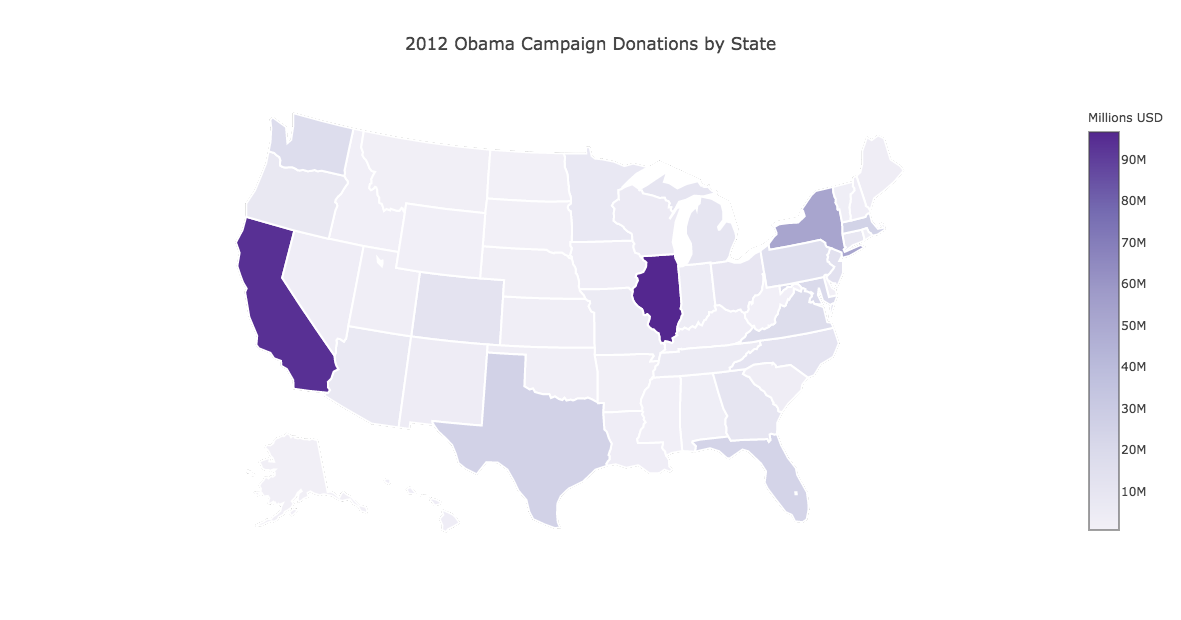

In [78]:
from IPython.display import Image
Image(filename='obama.png')

In [79]:
# Plot Romney's campaign donations to Plotly
import plotly.plotly as py

rm = pd.read_csv('romney donations', delimiter='\t')

for col in rm.columns:
    rm[col] = rm[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = rm['State'],
        z = rm["Romney's total donations ($)"].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Millions USD"
        )
    ) ]

layout = dict(
        title = '2012 Romney Campaign Donations by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
    
fig = dict(data=data, layout=layout)
url = py.plot(fig, validate=False, filename='d3-romney-map')

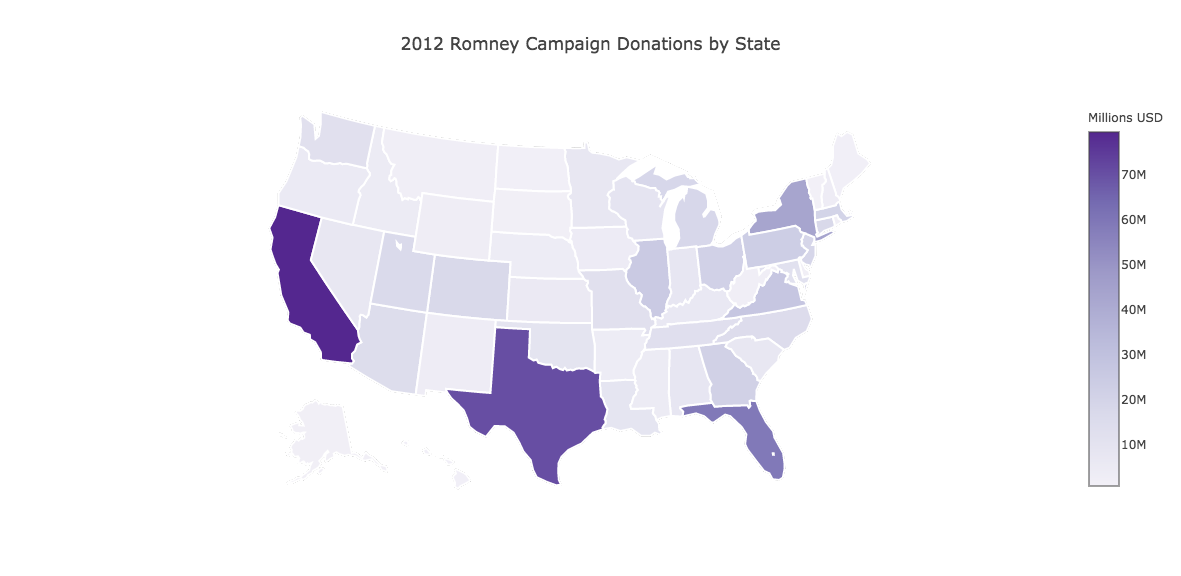

In [80]:
Image(filename='romney.png')

### Comparing Obama's and Romney's monthly campaign donations between March 2011 and December 2012

Mitt Romney received donations early beginning in May 2011 as he prepared to enter the Republican presidential primaries (February 1st 2012 - April 1st 2012). His donations increased significantly in April 2012 after he clinched the Republican nomination. Obama, on the other hand, began his re-election campaign in January 2012 and he was formally nominated as President at the Democratic National Convention in Charlotte, North Carolina, on September 6th 2012. Obama finalized his campaign on November 6th 2012 as he was re-elected with 51% popular vote and 332 electorate votes.

In [81]:
%matplotlib inline
from collections import defaultdict
import matplotlib.pyplot as plt
import csv, sys, datetime

reader = csv.DictReader(open("donations.txt", 'r'))

obamadonations = defaultdict(lambda:0)
romneydonations = defaultdict(lambda:0)

In [82]:
for row in reader:
    name = row['cand_nm']
    datestr = row['contb_receipt_dt']
    amount = float(row['contb_receipt_amt'])
    date = datetime.datetime.strptime(datestr, '%d-%b-%y')

    if 'Obama' in name:
        obamadonations[date] += amount
    if 'Romney' in name:
        romneydonations[date] += amount

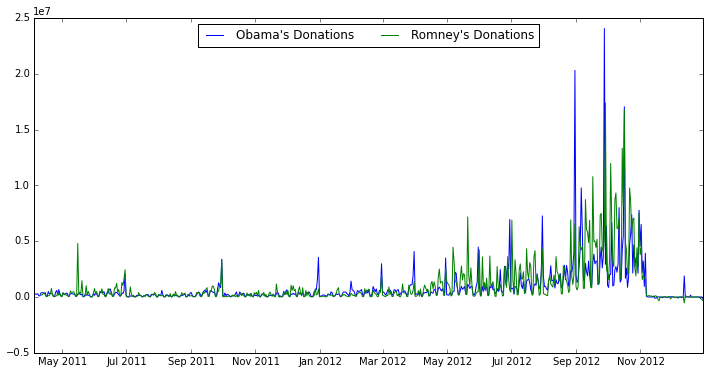

In [83]:
fig = plt.figure(figsize=(12,6))    # create a 12-inch x 6-inch figure
sorted_by_dateob = sorted(obamadonations.items(), key=lambda (key,val): key)
sorted_by_datemc = sorted(romneydonations.items(), key=lambda (key,val): key)
xs1,ys1 = zip(*sorted_by_dateob)
xs2,ys2 = zip(*sorted_by_datemc)
plt.plot(xs1, ys1, label="Obama's Donations")
plt.plot(xs2, ys2, label="Romney's Donations")
plt.legend(loc='upper center', ncol = 4)

### Comparing Obama's and Romney's cumulative campaign donations between March 2011 and December 2012

Mitt Romney and Barack Obama had similar cumulative donation amounts until September 2012, after Obama and Biden were formally nominated for President and Vice President at the 2012 Democratic National Convention. The increased donations to Mitt Romney likely signaled efforts by his contributors to reach out to potential voters through ground work and television commercials.

In [84]:
import csv,sys,datetime,collections
import itertools
import matplotlib.pyplot as plt

reader = csv.DictReader(open("donations.txt", 'r'))

totaldonations = collections.defaultdict(list)

In [85]:
for row in reader:
    name = row['cand_nm']
    datestr = row['contb_receipt_dt']
    amount = float(row['contb_receipt_amt'])
    date = datetime.datetime.strptime(datestr, '%d-%b-%y')
    
    if 'Obama' in name or 'Romney' in name:
        totaldonations[name].append((date, amount))

campaigntotals = dict([(name, sum(map(lambda p:p[1], val))) for name, val
                   in totaldonations.iteritems()])

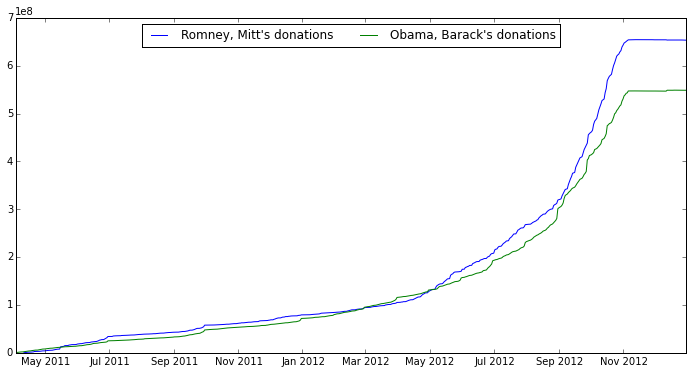

In [86]:
fig = plt.figure(figsize=(12,6))

idx = 0
# Obama's and Romney's cumulative donations
for name, monies in totaldonations.iteritems():
    monies.sort(key=lambda pair: pair[0])
    i = itertools.groupby(monies, key=lambda p: p[0])
    monies = map(lambda (key, pairs): (key, sum([float(pair[1]) for pair in pairs])), i)
    total = 0
    newmonies = []
    for pair in monies:
        total += pair[1]
        newmonies.append((pair[0], total ))
    monies = newmonies

    xs,ys = zip(*monies)
    plt.plot(xs, ys, label = name + "'s donations")
    idx += 1
plt.legend(loc='upper center', ncol = 4)

### Comparing Obama's and Romney's cumulative campaign reattributions between March 2011 and December 2012

In the campaign finance dataset, we see some of the data where the donation amount is negative. A quick modification of the code to output only the negative donation amounts:
import csv,sys,datetime
reader = csv.DictReader(open("donations.txt", 'r'))
```
for row in reader:
    name = row['cand_nm']
    datestr = row['contb_receipt_dt']
    amount = float(row['contb_receipt_amt'])
    if amount < 0:
        line = '\t'.join(row.values())
        print line
```

As it turns out, "redesignations" and "reattributions" of donations are [normal](http://www.fec.gov/pages/brochures/contrib.shtml#Excessive_Contributions). For instance, if a donation by person A is excessive, the part that exceeds the limits can be "reattributed" to person B, meaning that person B donated the rest to the campaign. Alternatively, the excess amount can be redesignated to another campaign in the same party. So a donation to Romney could be redesignated to a poor republican in Nebraska. However, "Reattribution to spouse" can be suspicious. A potential theory is that CEOs and wealthy contributors use it as a tactic to [hide campaign contributions](http://dailycaller.com/2011/07/06/huntsmans-website-double-the-donation-with-one-for-your-spouse/). For example, a CEO could donate money, then reattribute them to the donor's spouse. Then the spouse will donate that amount to the election candidate. In this way, a casual browser will find it difficult to notice that a the candidate is supoorted by a company's CEOs.

The campaign data indicates that Obama did not receive any reattributed donation but Romney received about \$4.1 million in reattribution especially between June 2012 and October 2012 when the presidential election race heated up.

In [87]:
import csv,sys,datetime,collections
import itertools
import matplotlib.pyplot as plt

reader = csv.DictReader(open("donations.txt", 'r'))

totalreattributions = collections.defaultdict(list)

In [88]:
for row in reader:
    name = row['cand_nm']
    datestr = row['contb_receipt_dt']
    amount = float(row['contb_receipt_amt'])
    date = datetime.datetime.strptime(datestr, '%d-%b-%y')
    reason = row['receipt_desc']
    
    if amount < 0 and 'REATTRIBUTION' in reason:
        if 'Obama' in name or 'Romney' in name:
            totalreattributions[name].append((date, -amount))

candreattributions = dict([(name, sum(map(lambda p:p[1], val))) for name, val
                   in totalreattributions.iteritems()])

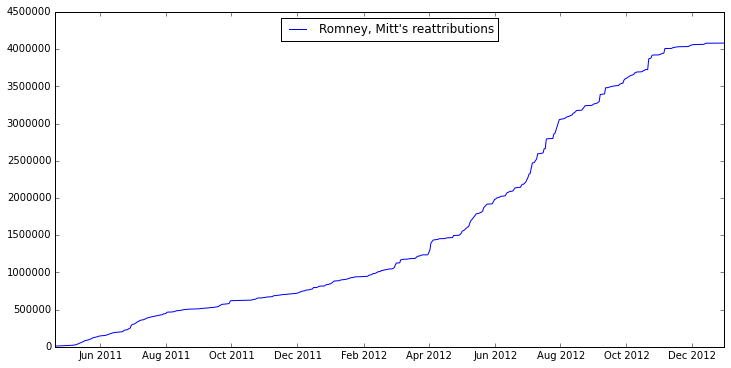

In [89]:
fig = plt.figure(figsize=(12,6))

idx = 0
# Obama's and McCain's cumulative reattributions
for name, monies in totalreattributions.iteritems():
    monies.sort(key=lambda pair: pair[0])
    i = itertools.groupby(monies, key=lambda p: p[0])
    monies = map(lambda (key, pairs): (key, sum([float(pair[1]) for pair in pairs])), i)
    total = 0
    newmonies = []
    for pair in monies:
        total += pair[1]
        newmonies.append((pair[0], total ))
    monies = newmonies

    xs,ys = zip(*monies)
    plt.plot(xs, ys, label = name + "'s reattributions")
    idx += 1
plt.legend(loc='upper center', ncol = 4)

### Comparing Obama's and Romney's cumulative campaign refunds between March 2011 and December 2012

In [90]:
import csv,sys,datetime,collections
import itertools
import matplotlib.pyplot as plt

reader = csv.DictReader(open("donations.txt", 'r'))

totalrefunds = collections.defaultdict(list)

In [91]:
for row in reader:
    name = row['cand_nm']
    datestr = row['contb_receipt_dt']
    amount = float(row['contb_receipt_amt'])
    date = datetime.datetime.strptime(datestr, '%d-%b-%y')
    reason = row['receipt_desc']
    
    if amount < 0 and 'Refund' in reason:
        if 'Obama' in name or 'Romney' in name:
            totalrefunds[name].append((date, -amount))

candrefunds = dict([(name, sum(map(lambda p:p[1], val))) for name, val
                   in totalrefunds.iteritems()])

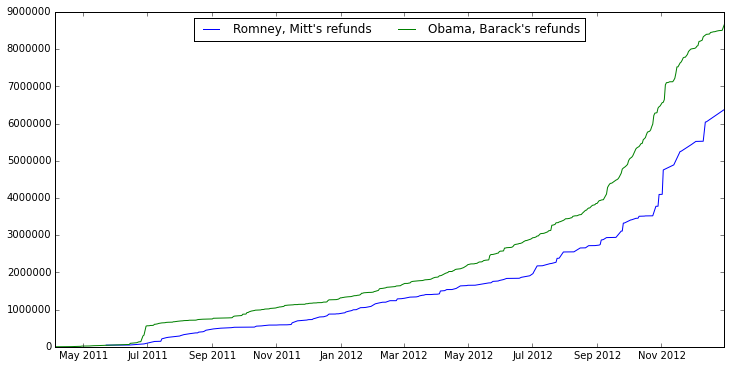

In [92]:
fig = plt.figure(figsize=(12,6))

idx = 0
# Obama's and McCain's cumulative reattributions
for name, monies in totalrefunds.iteritems():
    monies.sort(key=lambda pair: pair[0])
    i = itertools.groupby(monies, key=lambda p: p[0])
    monies = map(lambda (key, pairs): (key, sum([float(pair[1]) for pair in pairs])), i)
    total = 0
    newmonies = []
    for pair in monies:
        total += pair[1]
        newmonies.append((pair[0], total ))
    monies = newmonies

    xs,ys = zip(*monies)
    plt.plot(xs, ys, label = name + "'s refunds")
    idx += 1
plt.legend(loc='upper center', ncol = 4)

### Comparing distribution of Obama's and Romney's campaign donations
Because of the large number of outliers, we display the campaign donation distribution for both candidates within \$0 and \$1,500. Obama is on the right and Romney is on the left of the violin plot, and it indicates that Obama's donations were more concentrated in the smaller amounts between \$25 and \$150 while Romney's donations spanned a larger range.

In [116]:
import seaborn as sns
sns.set_style("whitegrid")

obrom = donations[(donations['cand_nm'].isin(['Obama, Barack', 'Romney, Mitt'])) &
                 (donations['contb_receipt_amt'] < 1200)]

obrom2 = obrom[obrom['contb_receipt_amt'] > 0]

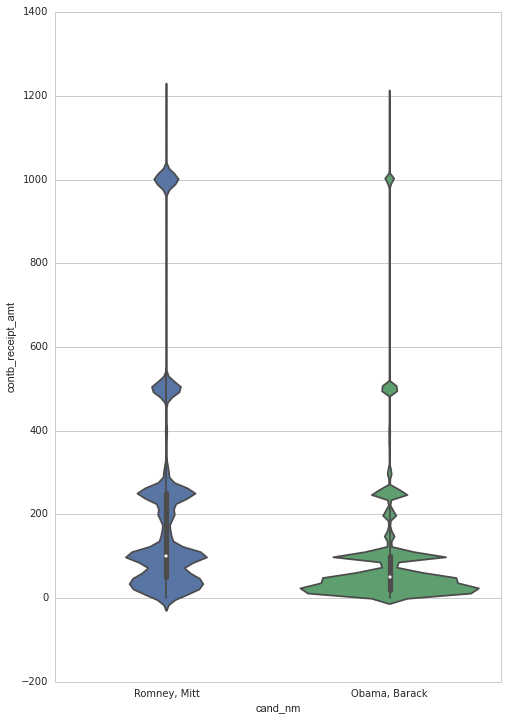

In [117]:
fig = plt.figure(figsize=(8,12))
ax = sns.violinplot(x="cand_nm", y="contb_receipt_amt", data=obrom2)

### Performing ttests on Obama's and Romney's campaign donations data
I perform a Welch's T-test on the data to determine if the difference between Romney's and Obama's average campaign contribution is significant. The reported p-value is within rounding error of 0, which is statistically significant.

In [118]:
# Part I
# Run Welch's T-test on donations.txt. Is the difference between Romney and Obama's average 
# compaign contribution significant?
import csv,sys,datetime,collections
import numpy
import scipy.stats
import welchttest

reader = csv.DictReader(open("donations.txt", 'r'))
idx = 0

candtomoney = collections.defaultdict(list)

In [119]:
for row in reader:
    name = row['cand_nm']
    amount = float(row['contb_receipt_amt'])
    candtomoney[name].append(amount)

obama = candtomoney["Obama, Barack"]
romney = candtomoney["Romney, Mitt"]

In [120]:
print "Welch's T-Test p-value:", welchttest.ttest(obama, romney)

Welch's T-Test p-value: 0.0


Because the Welch's T-test makes no assumption about the size of the dataset or its variances, I have likely violated the assumption that the campaign finance data is normally distributed. I conduct the Shapiro-Wilk test to check if the data is actually normal for both presidential candidates. In this case, the test calculates a p-value and tells us that it is not normally distributed if the p-value <0.05. 

Obama has a Shapiro-Wilks p-value of 0.000577, which indicates that I have violated the normality assumption of the Welch's T-test.

In [121]:
print "Obama's Shapiro-Wilks p-value", scipy.stats.shapiro(obama)
print "Romney's Shapiro-Wilks p-value", scipy.stats.shapiro(romney)

Obama's Shapiro-Wilks p-value (0.0005766153335571289, 0.0)
Romney's Shapiro-Wilks p-value (0.6059192419052124, 0.0)


/Users/shengli/anaconda/lib/python2.7/site-packages/scipy/stats/morestats.py:1082: UserWarning:

p-value may not be accurate for N > 5000.



Because T-Tests are resilient to breaking of the normality assumption and there are nonparametric equivalents that don't make normality assumptions, I run the Mann-Whitney U nonparametric T-test to determine on the campaign dataset. The reported p-value is about 0, so the result is still statistically significant.

In [122]:
print "mann-whitney U", scipy.stats.mannwhitneyu(obama, romney)

mann-whitney U MannwhitneyuResult(statistic=1801695785317.0, pvalue=0.0)


### Which occupations were more generous to either candidate?

Among the campaign contributors that donated to either Barack Obama or Mitt Romney, only 13 contributors from 8 different occupations personally contributed at least \$5,000 to Obama's re-election campaign. On the other hand, 167 individuals from 36 different occupations (primarily chief executive officers, presidents and business owners) donated at least \$5,000 to Romney's re-election campaign

In [143]:
obama = donations[(donations['cand_nm'] == 'Obama, Barack') & 
                  (donations['contb_receipt_amt'] > 5000)]
obOcc = obama.groupby('contbr_occupation')

In [149]:
obOcc_sum = obOcc['contb_receipt_amt'].agg([np.sum, np.mean, len])
obOcc_sum.columns = ["Obama's total donations ($)", "Obama's average donation ($)", 
                    "Number of donors"]
obOcc_sum

,Obama's total donations ($),Obama's average donation ($),Number of donors
contbr_occupation,,,
ARTIST/ PERSONAL ORGANIZER,39200,39200,1
ATTORNEY,25800,25800,1
CEO,10000,10000,1
DOCUMENTARY PHOTOGRAPHER,10000,10000,1
FINANCIAL CONSULTANT,7750,7750,1
INFORMATION REQUESTED,35000,17500,2
PROFESSOR,20000,20000,1
PUBLIC RELATIONS,33300,33300,1
RETIRED,93800,23450,4


In [145]:
romney = donations[(donations['cand_nm'] == 'Romney, Mitt') & 
                  (donations['contb_receipt_amt'] > 5000)]
rmOcc = romney.groupby('contbr_occupation')

In [150]:
rmOcc_sum = rmOcc['contb_receipt_amt'].agg([np.sum, np.mean, len])
rmOcc_sum.columns = ["Romney's total donations ($)", "Romney's average donation ($)", 
                    "Number of donors"]
rmOcc_sum

,Romney's total donations ($),Romney's average donation ($),Number of donors
contbr_occupation,,,
ATTORNEY,20000.00,10000.000000,2
BANKER,15000.00,7500.000000,2
BUSINESS,25000.00,25000.000000,1
BUSINESS OWNER,20000.00,10000.000000,2
BUSINESS SALES,20000.00,10000.000000,2
BUSINESSMAN,20000.00,10000.000000,2
C.E.O,20000.00,10000.000000,2
C.E.O.,20000.00,10000.000000,2
C.O.O.,30074.00,7518.500000,4


### Resource
The 2012 Presidential Campaign Contributions dataset is available [here](ftp://ftp.fec.gov/FEC/Presidential_Map/2012/P00000001/P00000001-ALL.zip).